In [13]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

In [3]:
alaska = pd.read_csv(f'../data/alaska.csv')
alaska['week'] = pd.to_datetime(alaska['week'], format = '%Y-%m-%d')
alaska.head()

,state,week,depression,anxiety,addiction,counselling,mental_health,stay_at_home,mask_mandate,gatherings_banned,business_closures,travel_restrictions
0,Alaska,2017-12-31,28,46,24,37,0,0,0,0,0,0
1,Alaska,2018-01-07,37,45,25,65,37,0,0,0,0,0
2,Alaska,2018-01-14,10,46,16,53,30,0,0,0,0,0
3,Alaska,2018-01-21,33,41,10,35,14,0,0,0,0,0
4,Alaska,2018-01-28,32,24,0,40,0,0,0,0,0,0


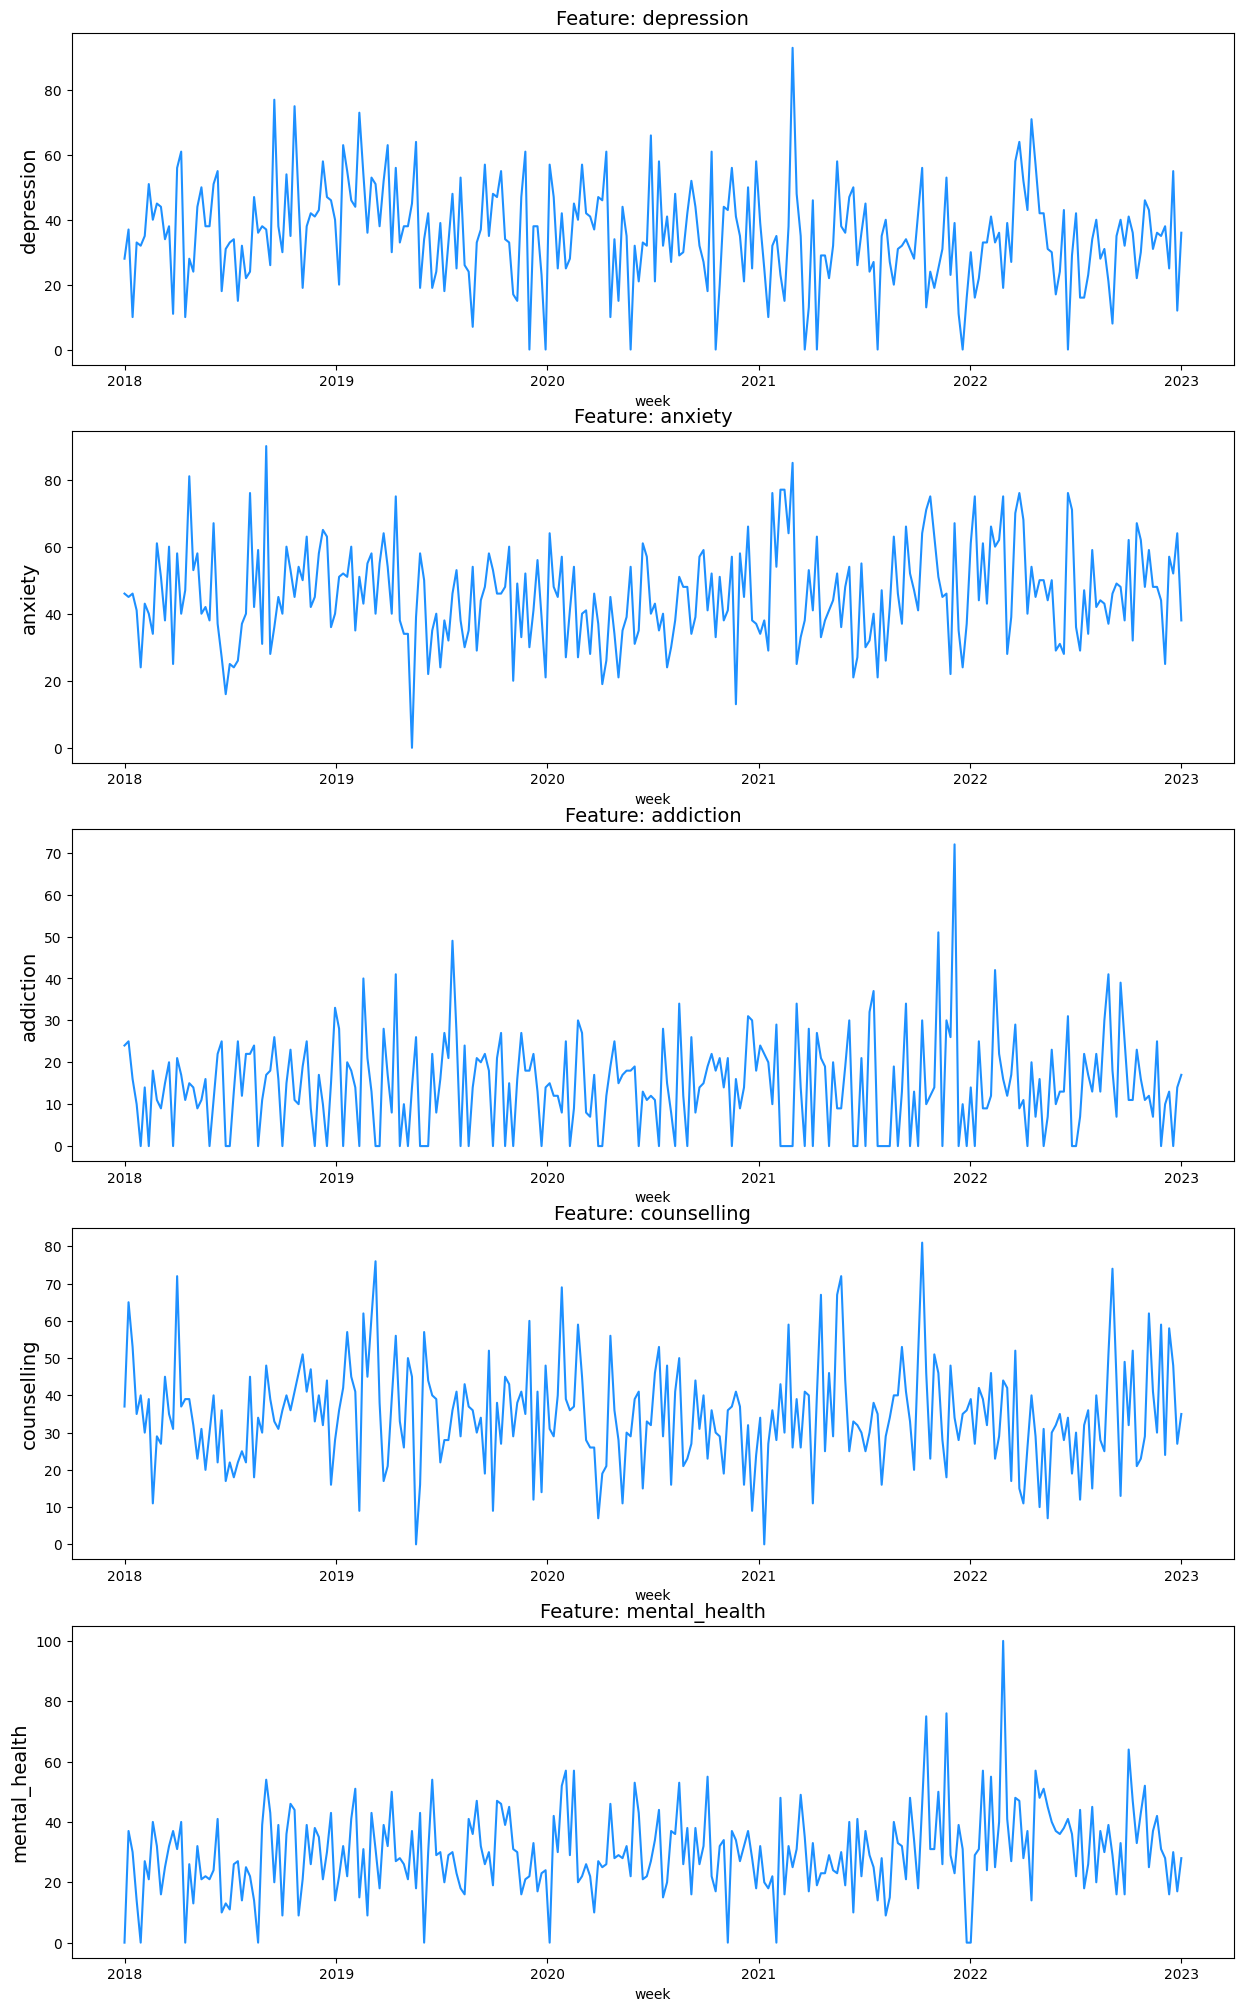

In [8]:
# Plot features distributions adapted from https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(alaska[['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']]):
    sns.lineplot(x=alaska['week'], y=alaska[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)                    
plt.tight_layout();       

In [16]:
# Check for Stationarity adapted from https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
        
        
for name, column in alaska[['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']].iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "depression" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -14.3471
 No. Lags Chosen       = 0
 Critical value 1%     = -3.456
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "anxiety" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.3689
 No. Lags Chosen       = 1
 Critical value 1%     = -3.456
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "addiction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance L